Temporal evolution, one zone, only cooling
==========================================

## Cooling only the newly injecting electrons

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.3.0rc9


This is a very preliminary documentation for the temporal evolution capabilities of jetset. Here we show how to create a a radiativeregion, and how to evolve the system in order to generate both particle spectra, SEDs, and lightcurves

definition of the injected particle distributio,, and of the jet model for the radiative region

In [4]:
from jetset.jet_model import Jet
jet_model=Jet()


===> setting C threads to 12


In [5]:
from jetset.jet_emitters_factory import InjEmittersFactory

q_inj=InjEmittersFactory().create_inj_emitters('pl',emitters_type='electrons',normalize=True)
q_inj.parameters.gmin.val=10
q_inj.parameters.gmax.val=1E6
q_inj.parameters.p.val=2.3

jet_model.parameters.beam_obj.val=30
jet_model.parameters.B.val=0.2
jet_model.parameters.z_cosm.val=0.03



here we set some relevant parameters taht will be described in detail in the next version of the documentation 

In [6]:
inj_duration=5E5 #This is in seconds in the blob rest frame
duration=inj_duration*2

T_esc_rad=2 #This is in units of R/c
L_inj=1.0E40 #This is in erg/s
T_SIZE=1E4
NUM_SET=200


Here, we instantiate the `JetTimeEvol` object, passing the radiative region jet model, and the injected particle class. `only_radiation=True` **will disable the accleration region, and only the radiative region will be used.**

In [7]:
from jetset.jet_timedep import JetTimeEvol
temp_ev=JetTimeEvol(jet_rad=jet_model,Q_inj=q_inj,inplace=True,only_radiation=True)

===> setting C threads to 12
===> setting C threads to 12


Now, we setup some relevant parameters

In [8]:

temp_ev.rad_region.jet.nu_min=1E8
T_SIZE=np.int32(T_SIZE)




temp_ev.parameters.duration.val=duration
temp_ev.parameters.TStart_Inj.val=0
temp_ev.parameters.TStop_Inj.val=inj_duration
temp_ev.parameters.T_esc_rad.val=T_esc_rad
temp_ev.parameters.Esc_Index_rad.val=0
temp_ev.parameters.t_size.val=T_SIZE
temp_ev.parameters.num_samples.val=NUM_SET
temp_ev.parameters.L_inj.val=L_inj


temp_ev.parameters.gmin_grid.val=1.0
temp_ev.parameters.gmax_grid.val=1E8
temp_ev.parameters.gamma_grid_size.val=1500
temp_ev.init_TempEv()
temp_ev.show_model()


--------------------------------------------------------------------------------
JetTimeEvol model description
--------------------------------------------------------------------------------
 
physical setup: 

--------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,1.000000e+02,s,0.0005995849159999999,R/c,False
log. sampling,time,0.000000e+00,,None,,False
R/c,time,1.667820e+05,s,1.0,R/c,False
IC cooling,,off,,None,,False
Sync cooling,,on,,None,,False
Adiab. cooling,,on,,None,,False
Reg. expansion,,off,,None,,False
Tesc rad,time,3.335641e+05,s,2.0,R/c,False
R_rad rad start,region_position,5.000000e+15,cm,None,,False
R_H rad start,region_position,1.000000e+17,cm,None,,False



model parameters: 

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.000000e+06,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.000000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+08,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.500000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,5.000000e+05,0.000000e+00,--,False,True
jet_time_ev,T_esc_rad,escape_time,(R/c)*,2.000000e+00,--,--,False,True
jet_time_ev,Esc_Index_rad,fp_coeff_index,,0.000000e+00,--,--,False,True
jet_time_ev,R_rad_start,region_size,cm,5.000000e+15,0.000000e+00,--,False,True
jet_time_ev,R_H_rad_start,region_position,cm,1.000000e+17,0.000000e+00,--,False,True


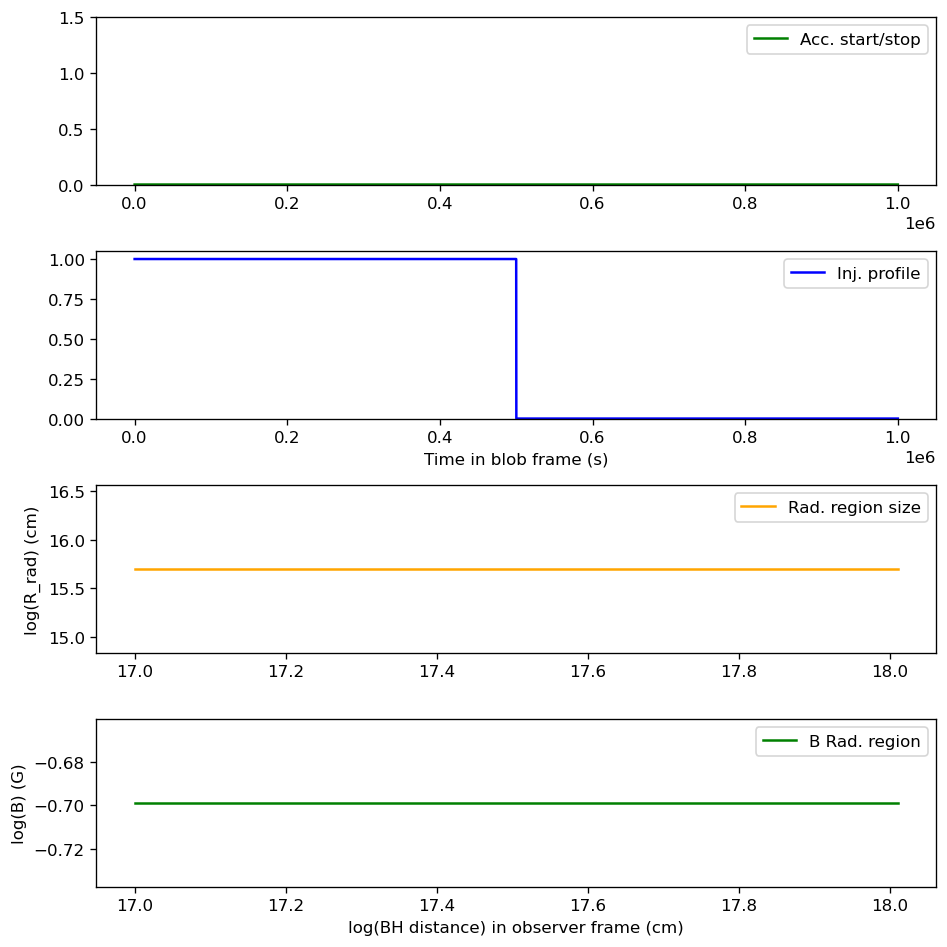

In [9]:
temp_ev.plot_time_profile()

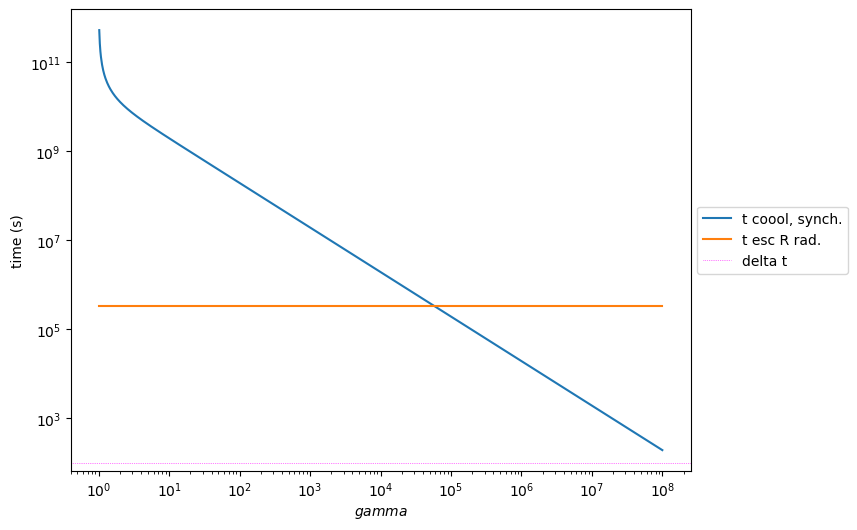

In [10]:
p=temp_ev.plot_pre_run_plot(dpi=100)


In [11]:
only_injection=True
do_injection=True
eval_cross_time=False
rest_frame='obs'
temp_ev.run(only_injection=only_injection,
            do_injection=do_injection,
            cache_SEDs_rad=True)

temporal evolution running


  0%|          | 0/10000 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/200 [00:00<?, ?it/s]

caching SED for each saved distribution: done


Particle spectrum in the radiative region

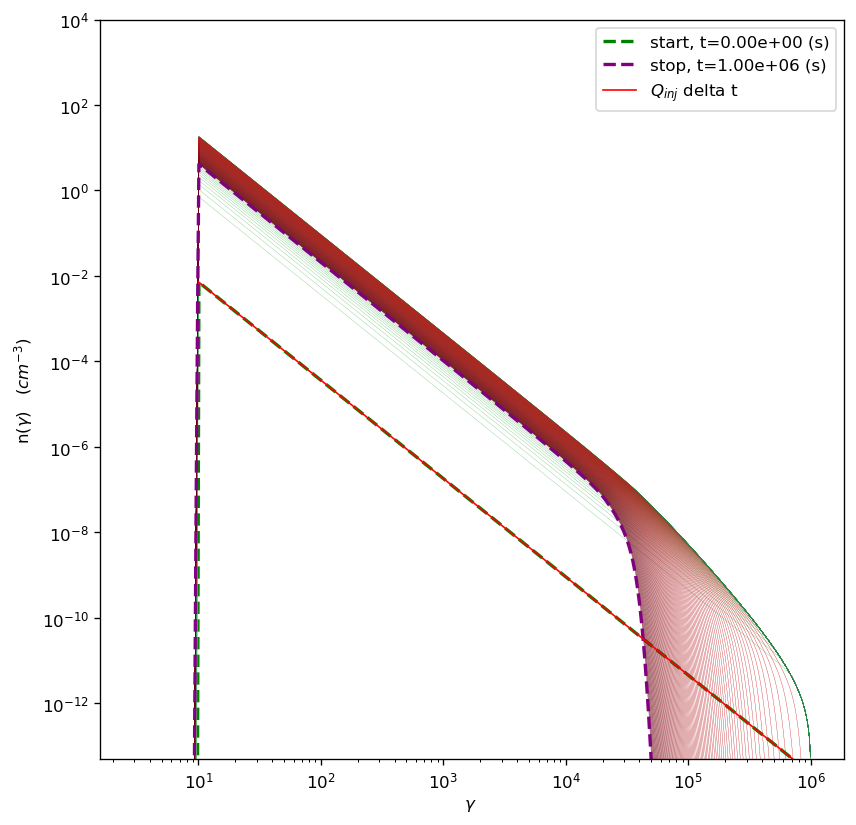

In [12]:
p=temp_ev.plot_tempev_emitters(region='rad',loglog=False,energy_unit='gamma',pow=0)
p.setlim(y_min=5E-14,y_max=1E4)

SEDs in the radiative region

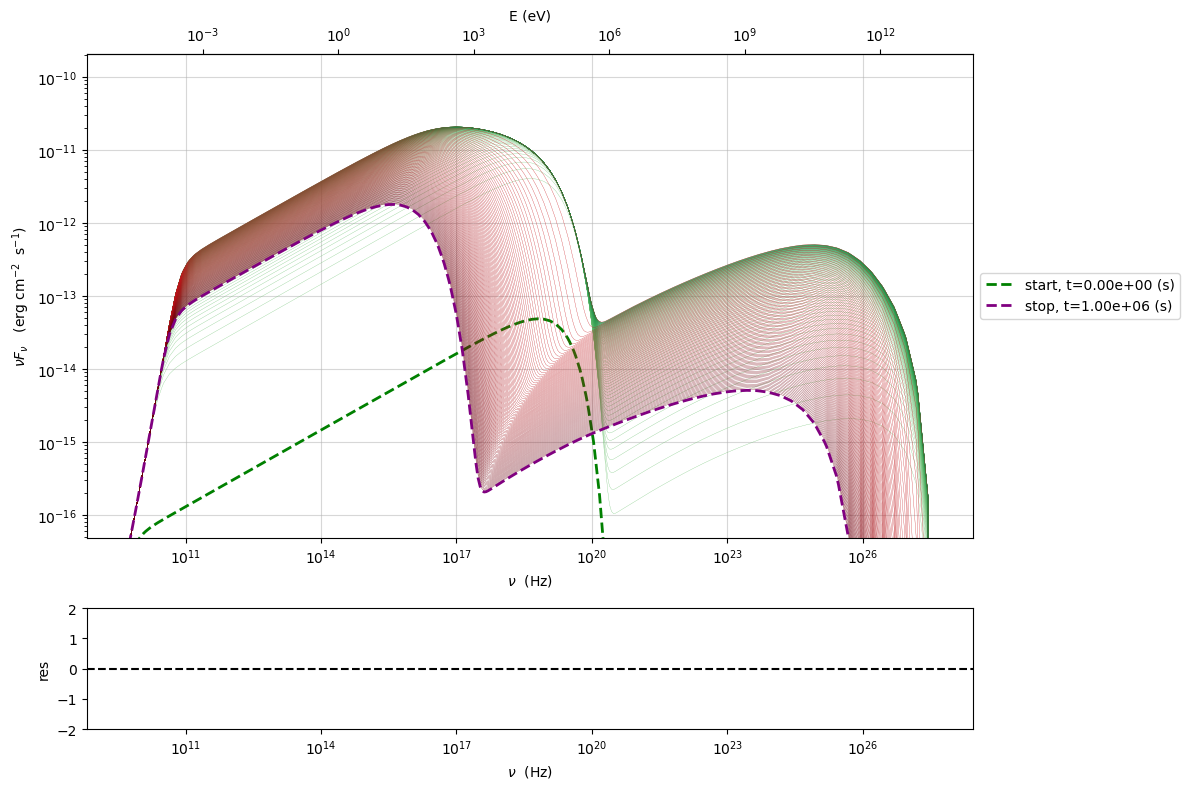

In [13]:
p=temp_ev.plot_tempev_model(region='rad',sed_data=None, use_cached = True)


We generate a lightcurve in the range nu1=2.4E22 Hz, nu2=7.2E25 Hz, without the effect of the light crossing time, in the observer frame

In [14]:
lg=temp_ev.rad_region.make_lc(nu1=2.4E22,nu2=7.2E25,name='gamma',eval_cross_time=False,delta_t_out=100,use_cached=True,frame='obs')


In [15]:
lg

time,flux,R_blob,t_blob
s,erg / (s cm2),cm,s
float64,float64,float64,float64
0.0,1.1408428468818105e-18,5000000000000000.0,0.0
100.0,3.097369417739573e-15,5000000000000000.0,2912.6213592233007
200.0,6.193597992632264e-15,5000000000000000.0,5825.242718446601
300.0,9.289826567524954e-15,5000000000000000.0,8737.864077669903
400.0,1.4637329609431923e-14,5000000000000000.0,11650.485436893203
500.0,2.1706395479055697e-14,5000000000000000.0,14563.106796116504
600.0,3.0675289260932043e-14,5000000000000000.0,17475.728155339806
700.0,4.0244304966067743e-14,5000000000000000.0,20388.349514563106


Text(0, 0.5, 'flux (erg / (s cm2))')

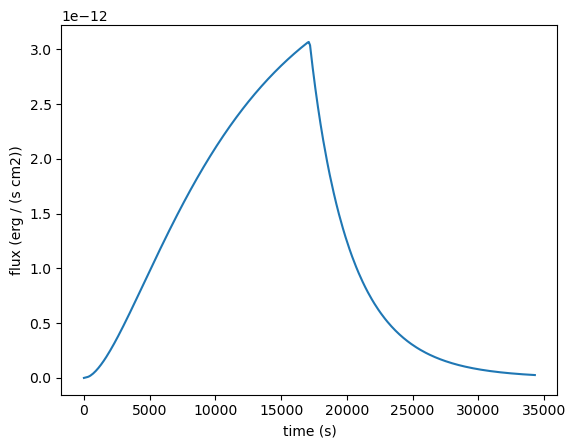

In [16]:
plt.plot(lg['time'],lg['flux'])
plt.xlabel('time (%s)'%lg['time'].unit)
plt.ylabel('flux (%s)'%lg['flux'].unit)

In [17]:
lg_cross=temp_ev.rad_region.make_lc(nu1=2.4E22,nu2=7.2E25,name='gamma',eval_cross_time=True,delta_t_out=1E2,use_cached=True,frame='obs',cross_time_slices=1000)


Text(0, 0.5, 'flux (erg / (s cm2))')

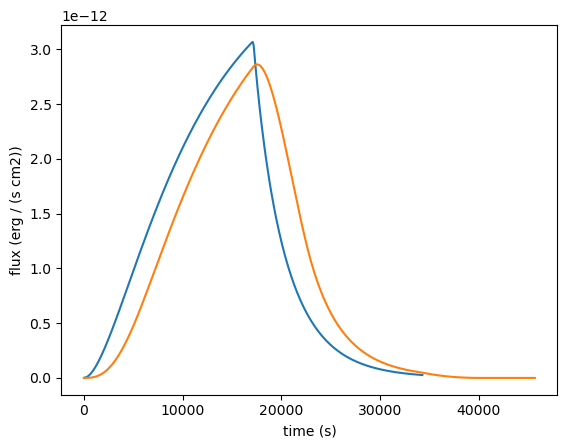

In [18]:
plt.plot(lg['time'],lg['flux'])
plt.plot(lg_cross['time'],lg_cross['flux'])

plt.xlabel('time (%s)'%lg['time'].unit)
plt.ylabel('flux (%s)'%lg['flux'].unit)

In [19]:
np.trapz(lg['flux'],lg['time']),np.trapz(lg_cross['flux'],lg_cross['time'])

(3.878e-08, 3.877e-08)

We can save the model and reuse it later for plotting lightcurcves, SEDs, and electron distributions

In [20]:
temp_ev.save_model('temp_ev_only_rad.pkl')

In [21]:
temp_ev_1=JetTimeEvol.load_model('temp_ev_only_rad.pkl')

===> setting C threads to 12
===> setting C threads to 12


In [22]:
temp_ev_1.show_model()

--------------------------------------------------------------------------------
JetTimeEvol model description
--------------------------------------------------------------------------------
 
physical setup: 

--------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,1.000000e+02,s,0.0005995849159999999,R/c,False
log. sampling,time,0.000000e+00,,None,,False
R/c,time,1.667820e+05,s,1.0,R/c,False
IC cooling,,off,,None,,False
Sync cooling,,on,,None,,False
Adiab. cooling,,on,,None,,False
Reg. expansion,,off,,None,,False
Tesc rad,time,3.335641e+05,s,2.0,R/c,False
R_rad rad start,region_position,5.000000e+15,cm,None,,False
R_H rad start,region_position,1.000000e+17,cm,None,,False



model parameters: 

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.000000e+06,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.000000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+08,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.500000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,5.000000e+05,0.000000e+00,--,False,True
jet_time_ev,T_esc_rad,escape_time,(R/c)*,2.000000e+00,--,--,False,True
jet_time_ev,Esc_Index_rad,fp_coeff_index,,0.000000e+00,--,--,False,True
jet_time_ev,R_rad_start,region_size,cm,5.000000e+15,0.000000e+00,--,False,True
jet_time_ev,R_H_rad_start,region_position,cm,1.000000e+17,0.000000e+00,--,False,True


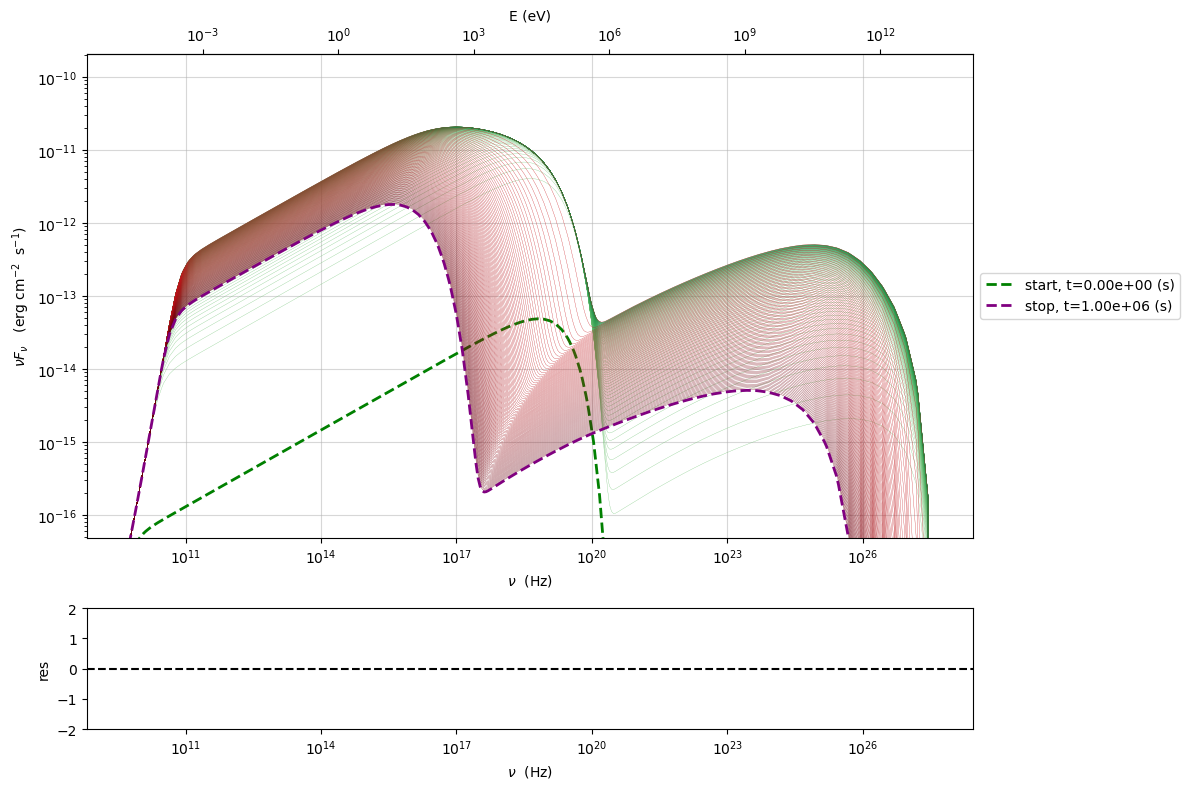

In [23]:
p=temp_ev_1.plot_tempev_model(region='rad',sed_data=None, use_cached = True)


Text(0, 0.5, 'flux (erg / (s cm2))')

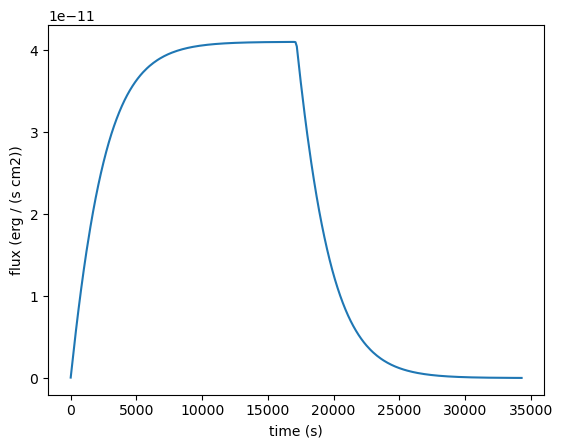

In [24]:
lx=temp_ev_1.rad_region.make_lc(nu1=1E17,nu2=1E18,name='X',eval_cross_time=False,delta_t_out=100,use_cached=True,frame='obs')
plt.plot(lx['time'],lx['flux'])
plt.xlabel('time (%s)'%lg['time'].unit)
plt.ylabel('flux (%s)'%lg['flux'].unit)